In [16]:
using DrWatson
@quickactivate
using Revise
includet("../scripts/plot.jl")
includet("../src/CurrentSheetTestParticle.jl")

In [140]:
df = get_results();
ldf, rdf = split_results(df);

┌ Info: Scanning folder /Users/zijin/projects/ion_scattering_by_SWD/data/simulations for result files.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:117
┌ Info: Added 288 entries.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:193


In [150]:
α_map = get_map(df, :α)
β_map = get_map(df, :β)
v_map = get_map(df, :v; rename_func = rename_value_pair)

αs = vals(df, :α)
βs = vals(df, :β);

In [33]:
# layer = data(temp_df) * mapping(col = α_map, row = β_map, color = v_map)

subset_v (generic function with 1 method)

In [14]:
# Create a layer with faceting for α, β, and v
begin
    using GLMakie
    GLMakie.activate!()
    fg = pa_pair_plot(layer; figure = figure)
end

In [83]:
func = subset_v ∘ subset_leave ∘ subset_β

subset_v ∘ subset_leave ∘ subset_β

In [109]:
α_map

AlgebraOfGraphics.Renamer{Vector{Float64}, Vector{String}}([0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345], ["α = 45.0°", "α = 56.25°", "α = 67.5°", "α = 78.75°"])

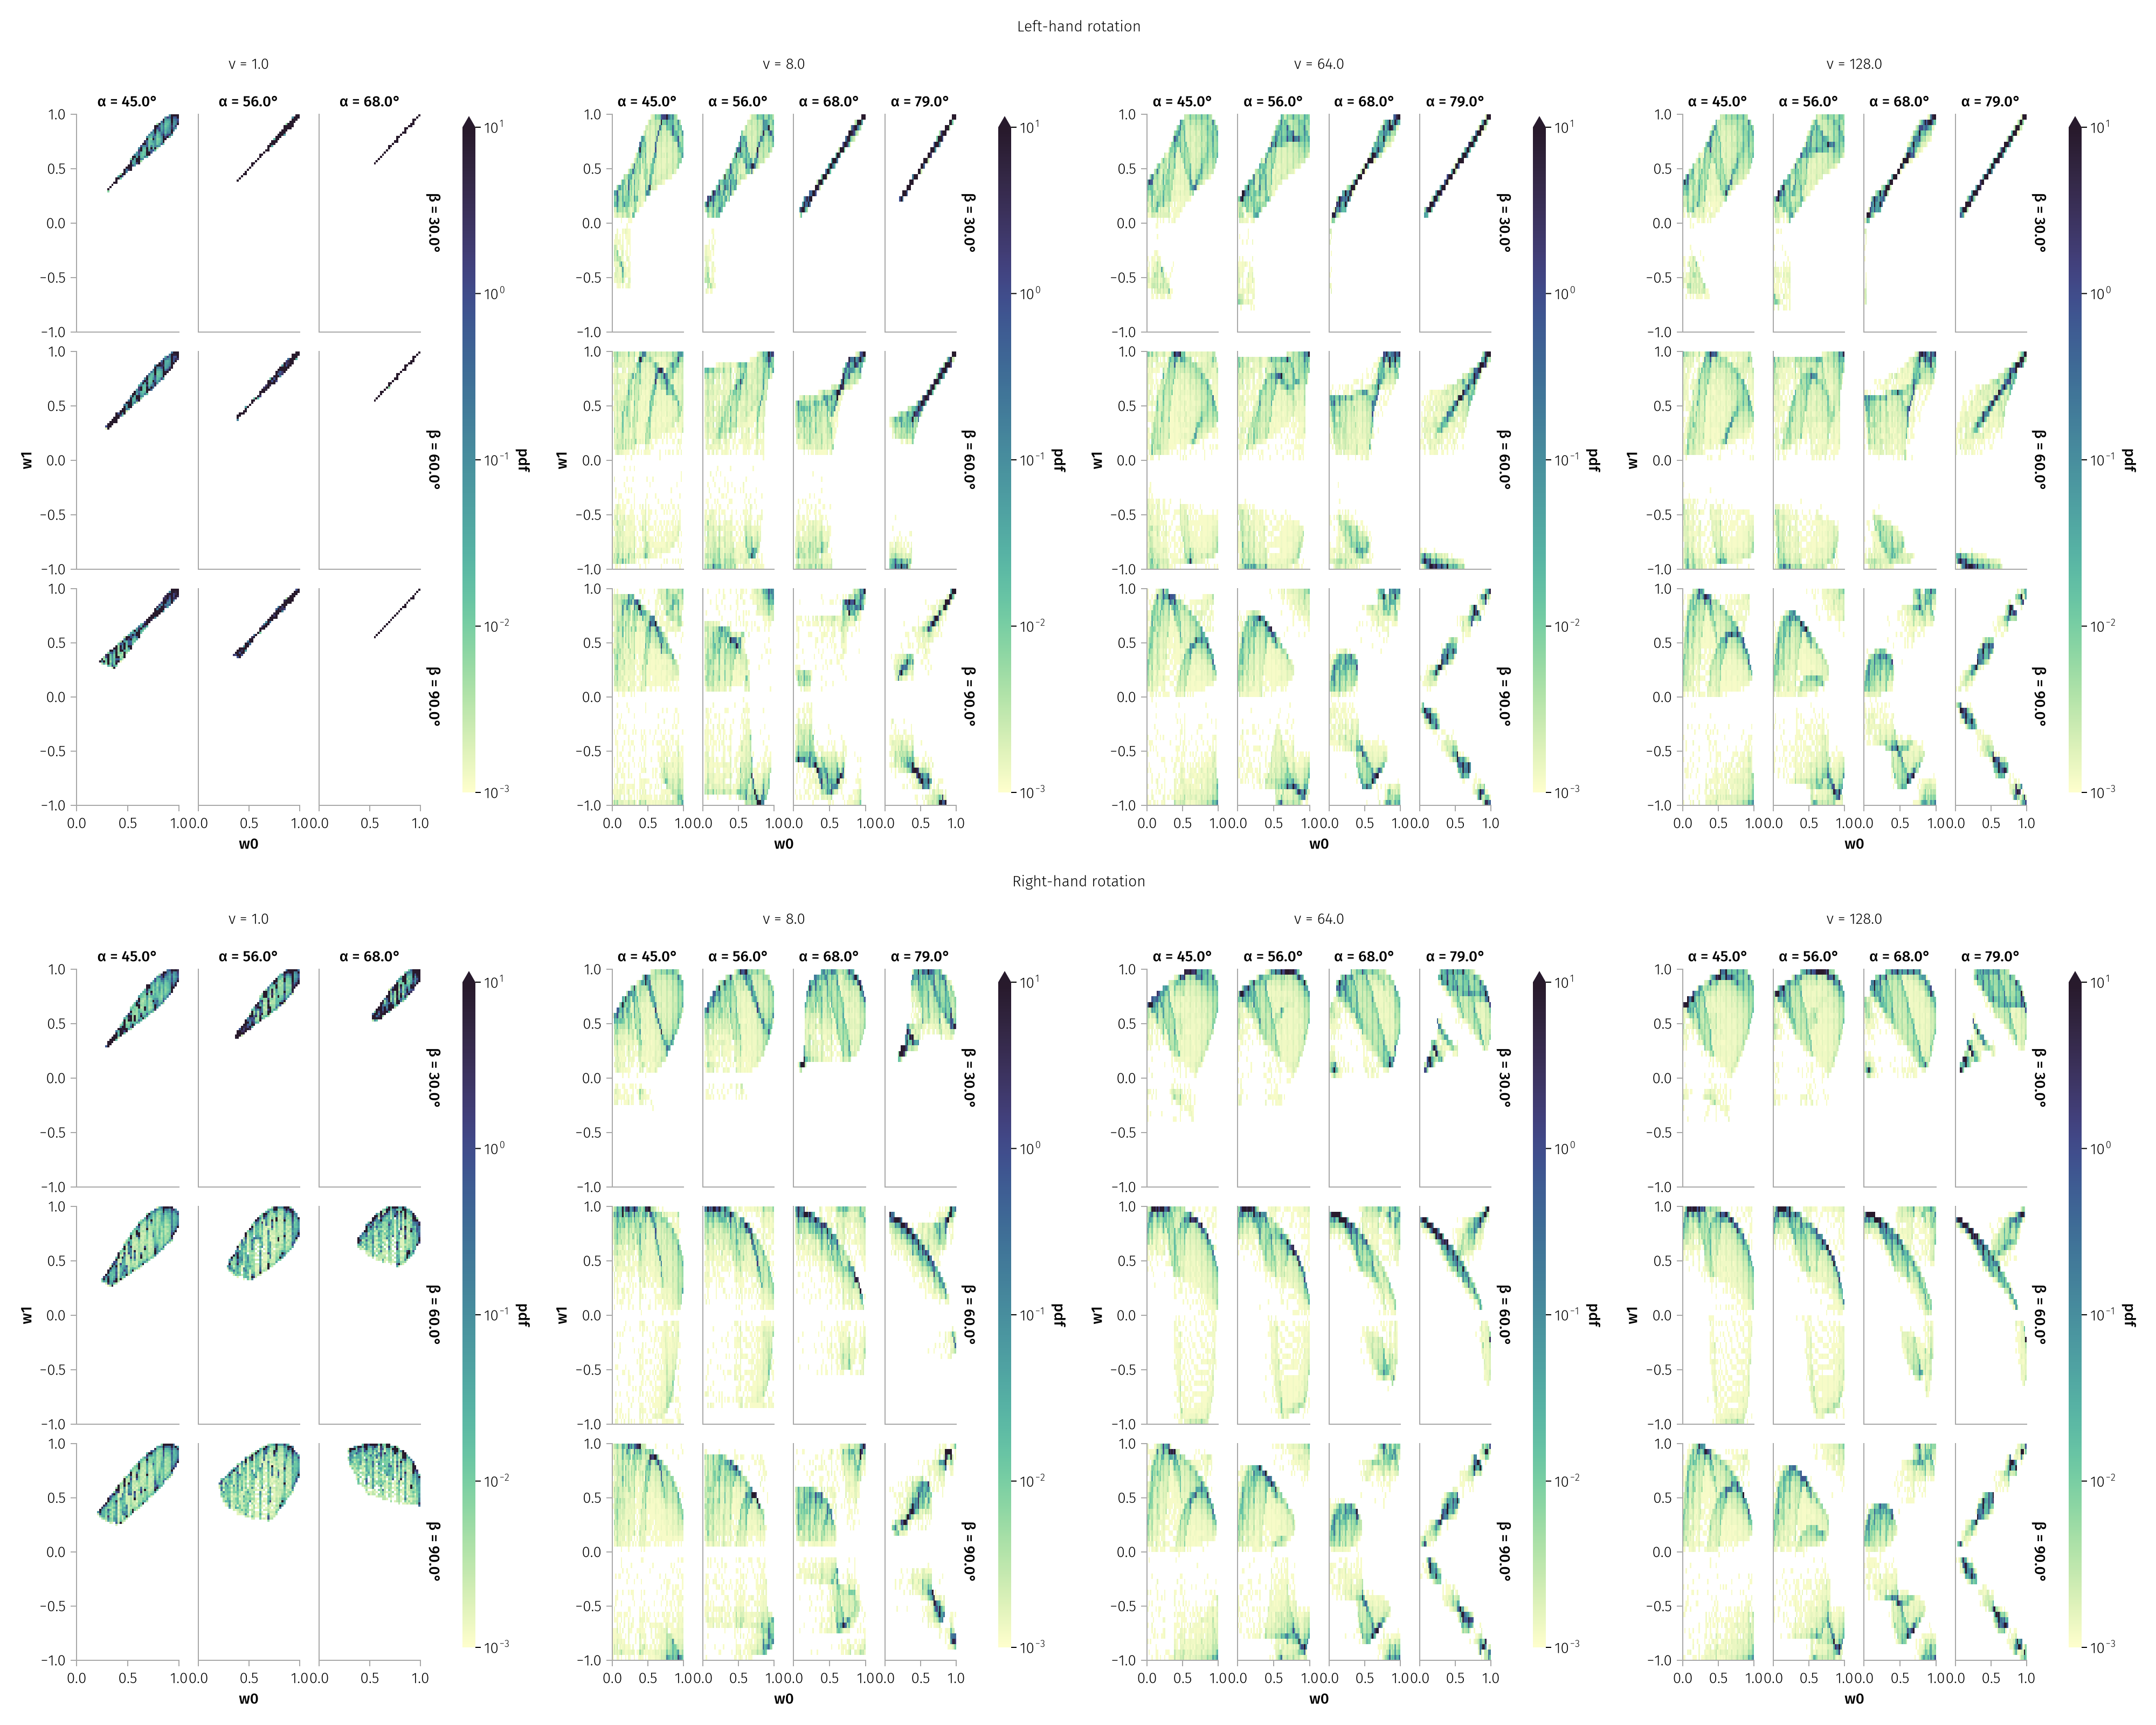

In [143]:
fig = Figure(;size=(2000, 1600))
axsl = [fig[1,i] for i in 1:4]
axsr = [fig[3,i] for i in 1:4]

pa_pair_plot_by_v!(func(ldf), axsl)
pa_pair_plot_by_v!(func(rdf), axsr)
Label(fig[0, :], "Left-hand rotation")
Label(fig[2, :], "Right-hand rotation")
fig

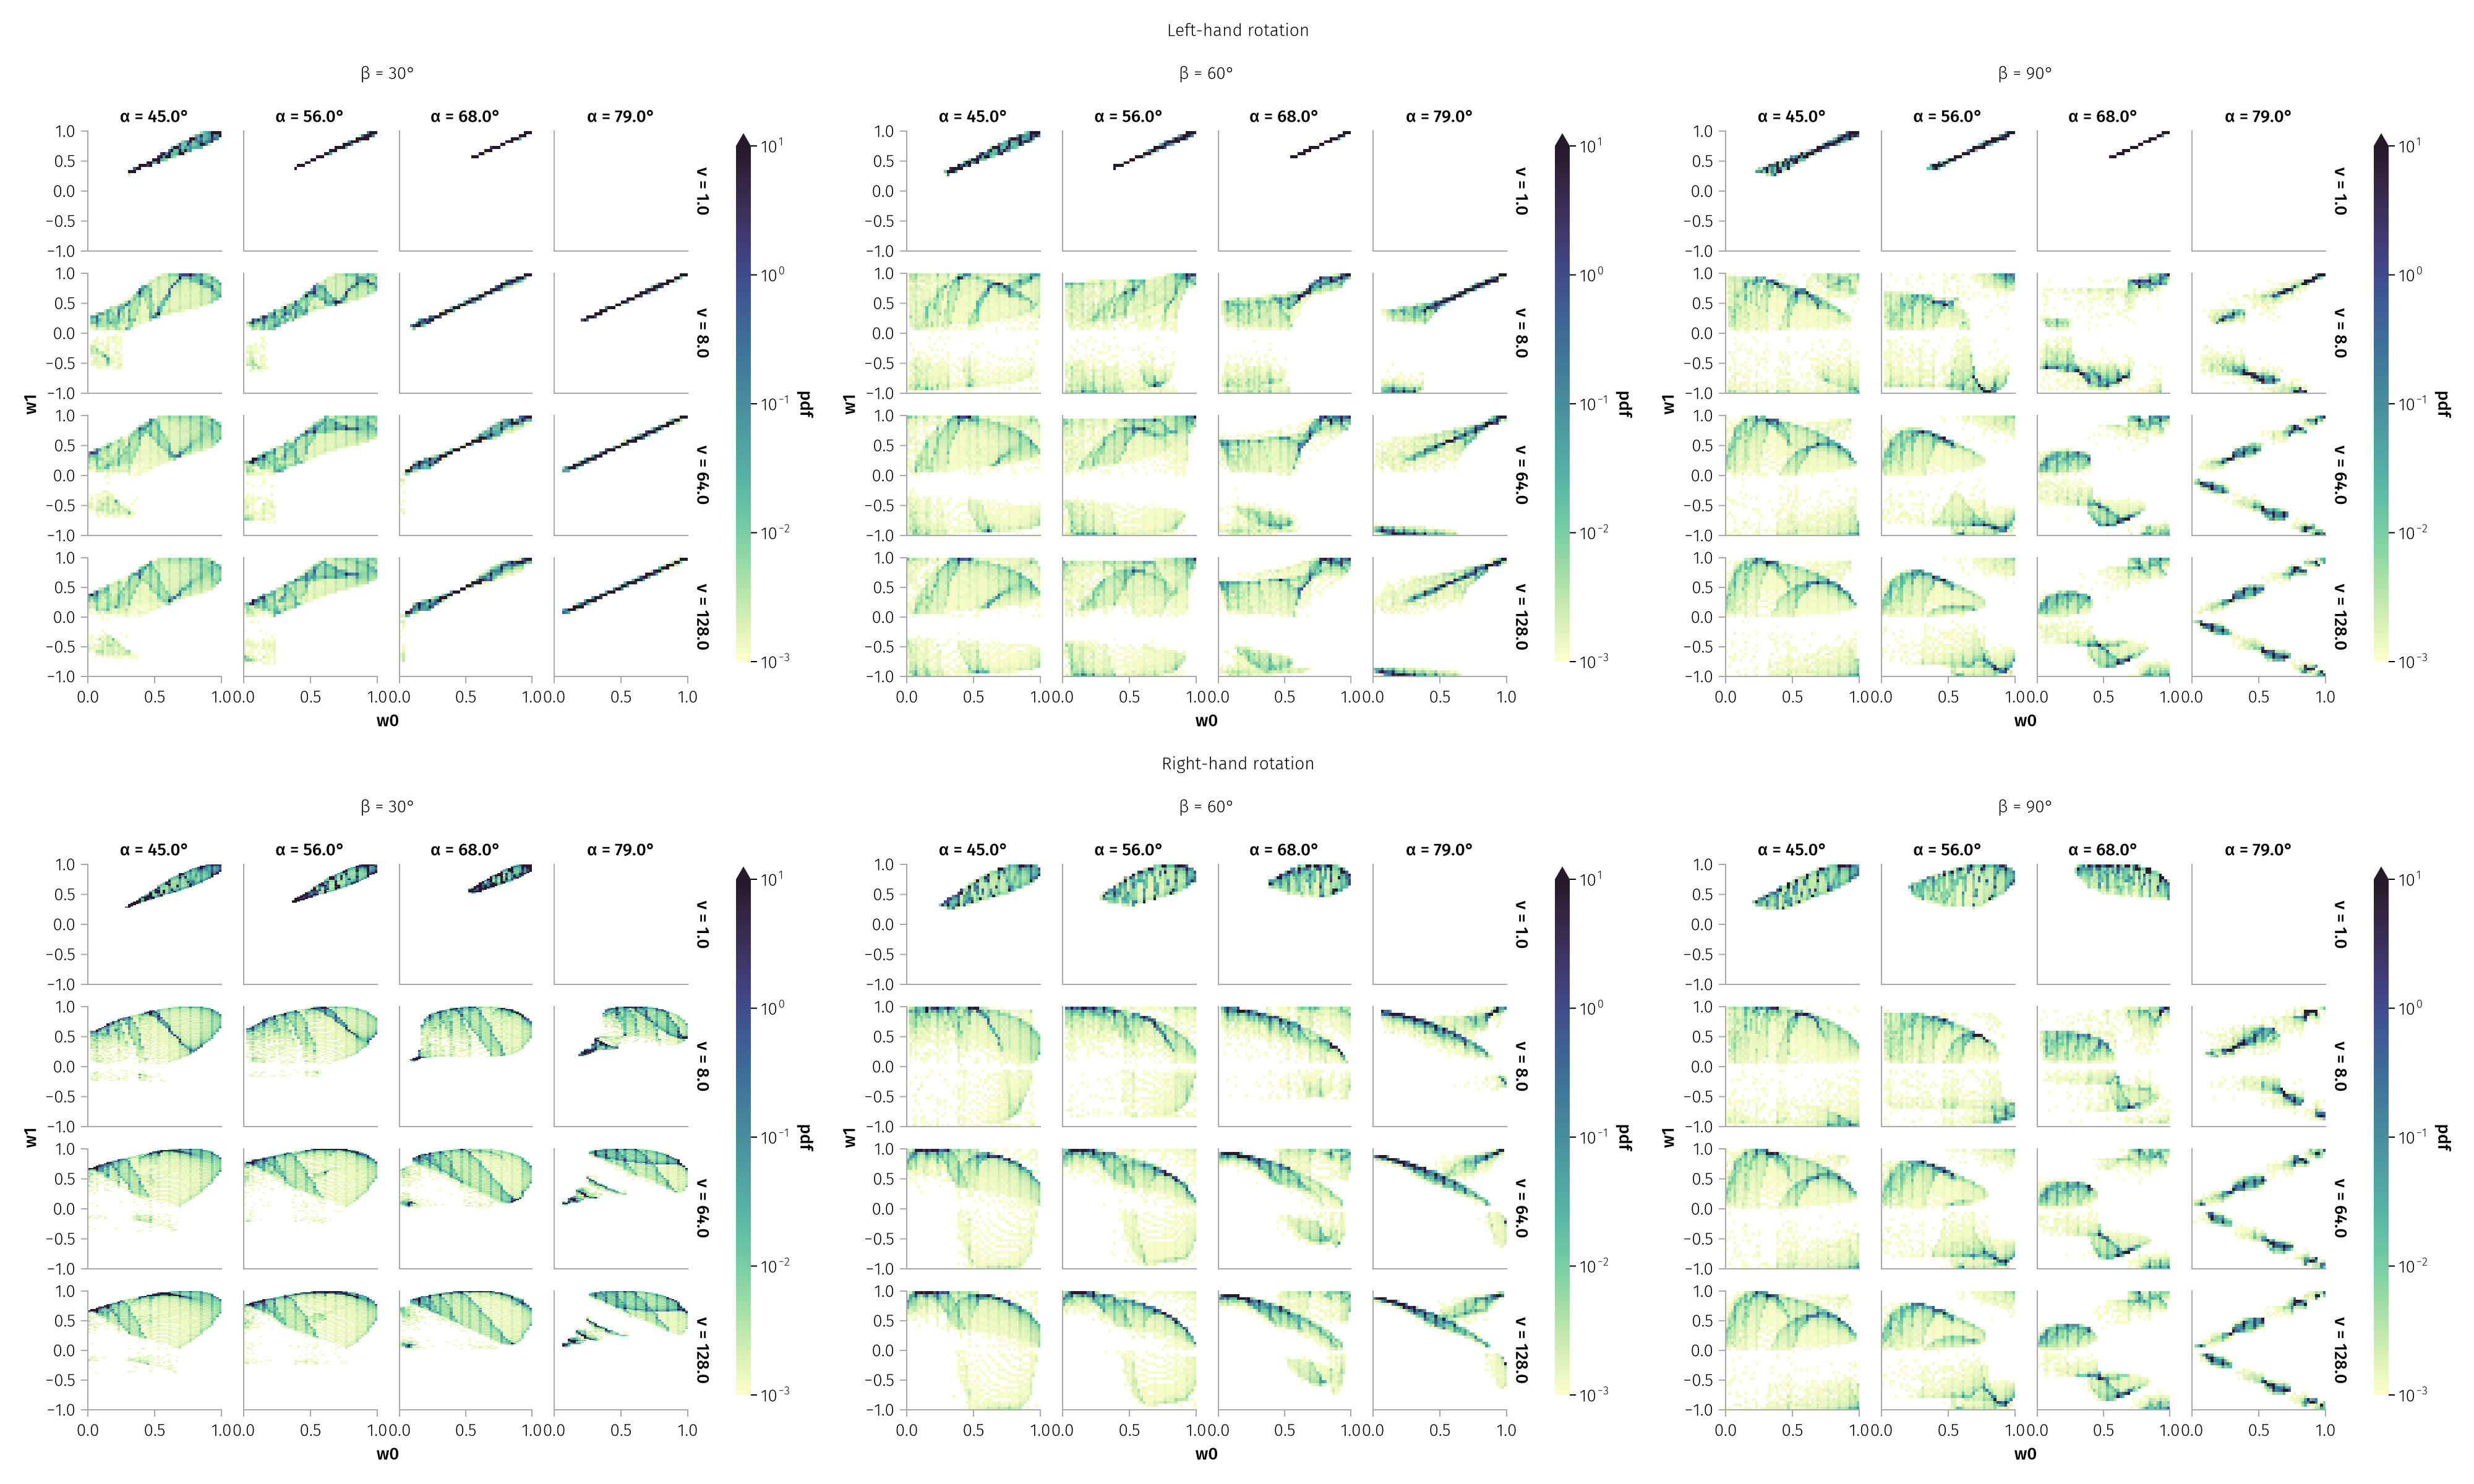

In [144]:
fig = Figure(;size=(2000, 1200))
axsl = [fig[1,i] for i in 1:6]
axsr = [fig[3,i] for i in 1:6]

pa_pair_plot_by_β!(func(ldf), axsl)
pa_pair_plot_by_β!(func(rdf), axsr)

Label(fig[0, :], "Left-hand rotation")
Label(fig[2, :], "Right-hand rotation")
fig

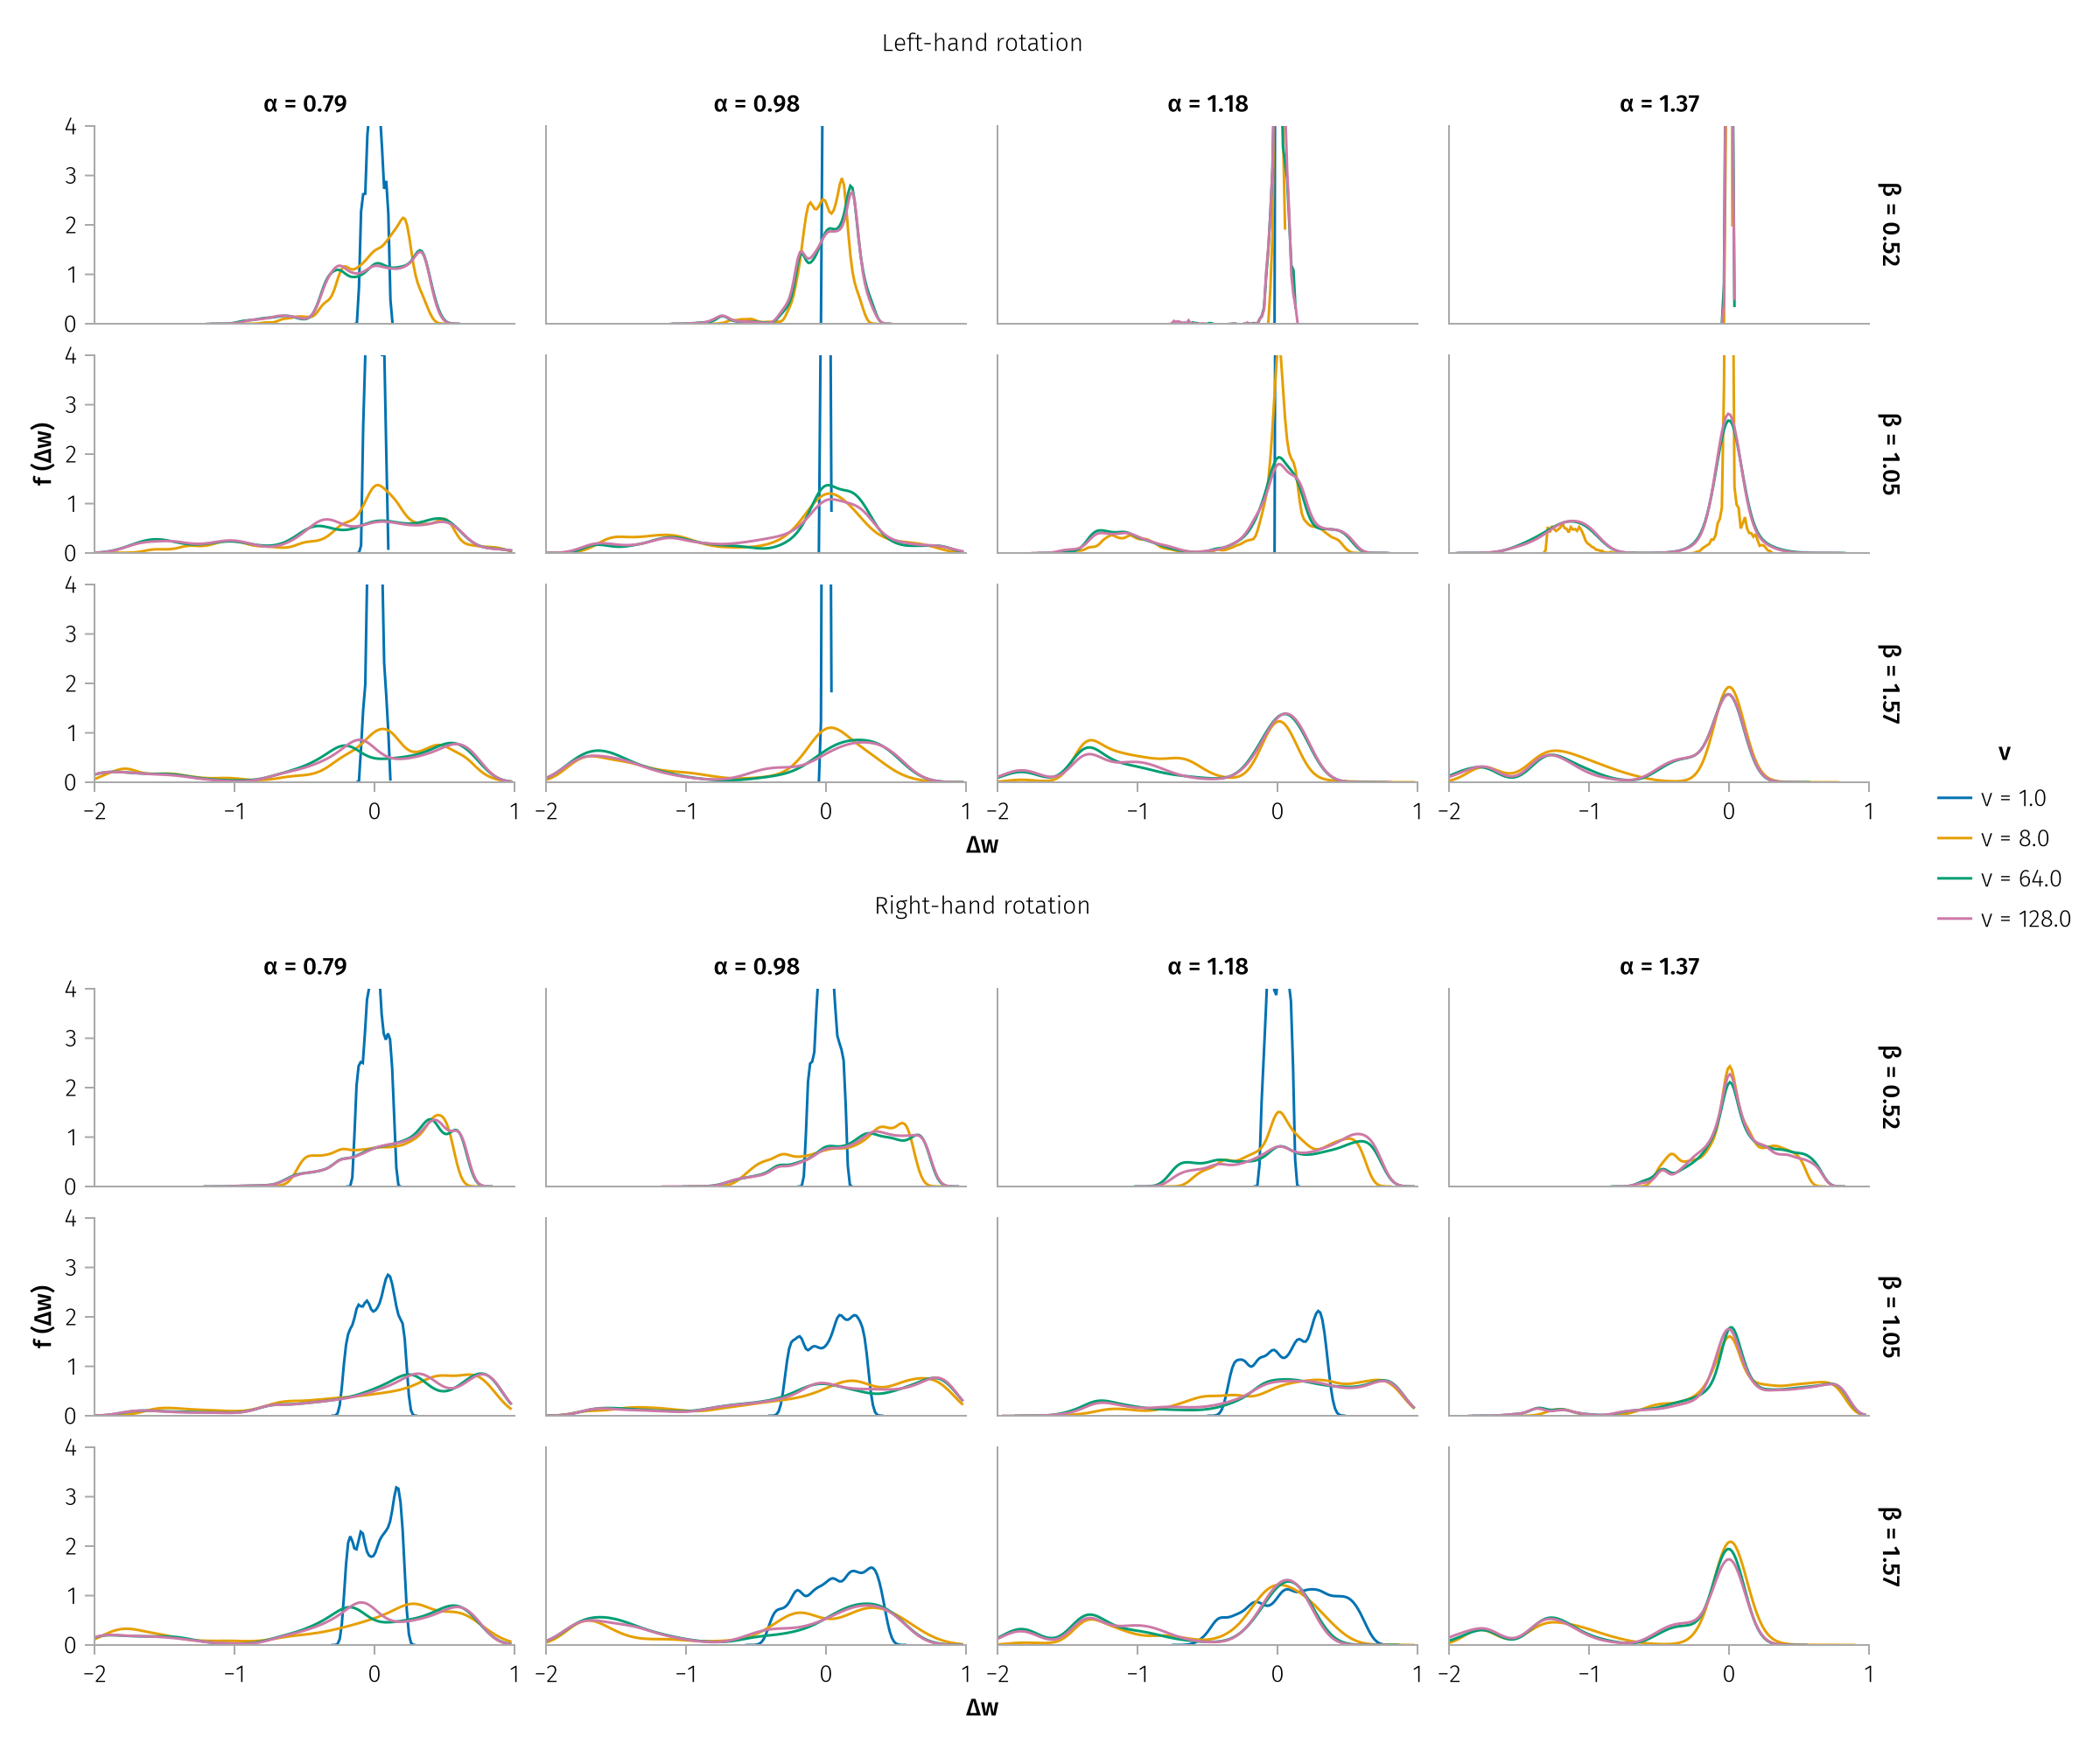

In [79]:
fig = Figure(; size=(1200, 1000,))
func = subset_v ∘ subset_leave ∘ subset_β

pa_diff_plot!(fig[1,1], func(ldf))
grids = pa_diff_plot!(fig[2,1], func(rdf))

Label(fig[1,1][0, :], "Left-hand rotation")
Label(fig[2,1][0, :], "Right-hand rotation")
legend!(fig[:,2], grids)
fig

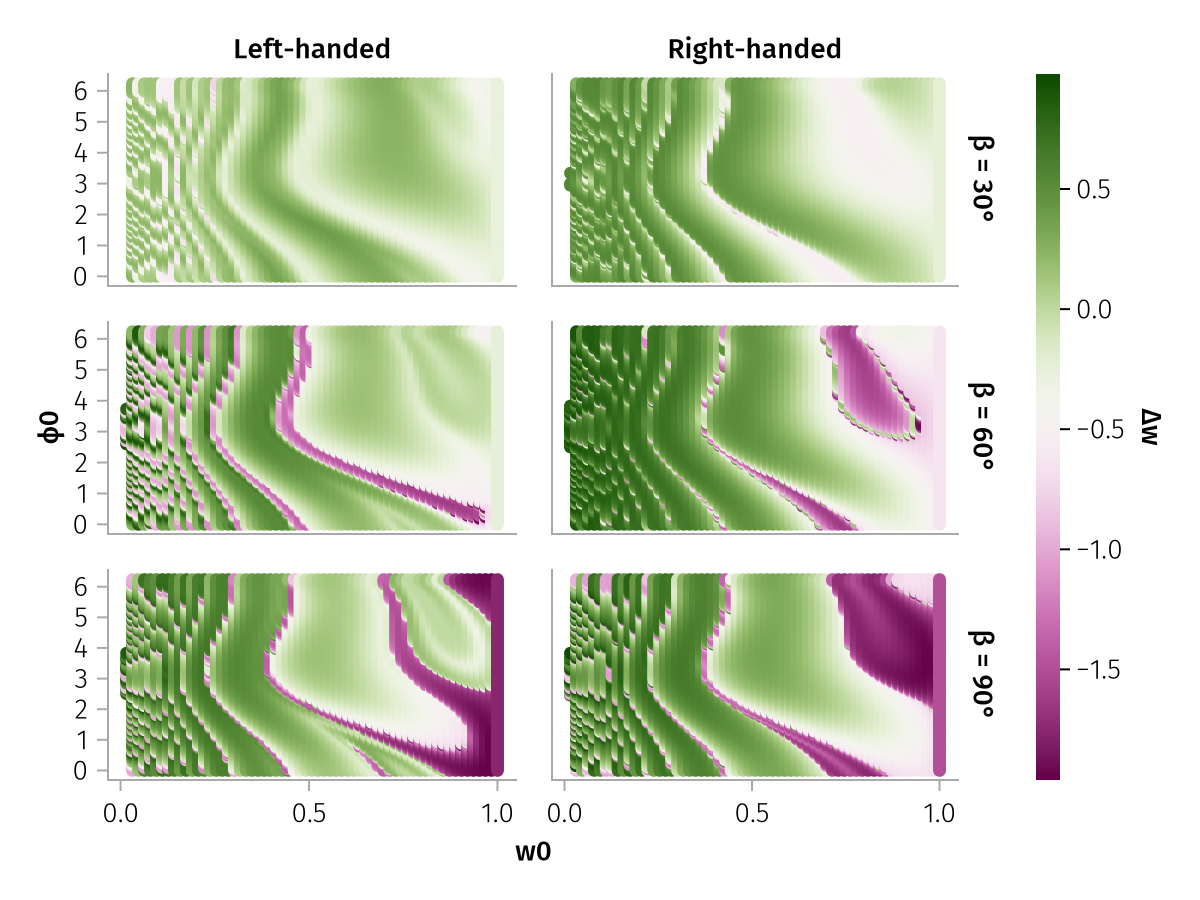

In [163]:
tdf = @subset(func(df), :v .== 8, :α .== 45);
l = data(tdf) * mapping(col=sign_map,row=β_map)
w1_map_plot(l; color=:Δw)